In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import ray
import ray.rllib.agents.ppo as ppo
import ray.rllib.agents.ddpg as ddpg
import ray.rllib.agents.sac as sac
import seagul.envs
import numpy as np
from numpy import pi
import gym
import pybullet_envs
from ray.rllib.models import ModelCatalog

from seagul.rllib.rllib_with_rbf.rbf_net import RBFModel1, RBFModel2
from seagul.rllib.rllib_with_rbf.mlp_net import MyKerasModel1, MyKerasModel2

In [20]:
# !! modify these as appropiate

algos = {
    "0": "A2C",
    "1": "A3C",
    "2": "APEX",
    "3": "APPO",
    "4": "DDPG",
    "5": "IMPALA",
    "6": "PG",
    "7": "PPO",
    "8": "SAC",
    "9": "TD3"
}
envs = {
    "0": "HumanoidBulletEnv-v0",
    "1": "Walker2DBulletEnv-v0",
    "2": "Pendulum-v0",
    "3": "HalfCheetahBulletEnv-v0"
}
alg = algos["7"]
current_env = envs["0"]
checkpoint = "160"
home_path = '/home/grabka/Documents/seagul/seagul/rllib/rllib_with_rbf/data/remote/'

checkpoint_path = home_path + "checkpoint_" + checkpoint + "/checkpoint-" + checkpoint

In [21]:
config = json.load(open(home_path + "params.json"))
df = pd.read_csv(home_path + "progress.csv")

In [22]:
# Some delightfully ugly python to infer where everything else is...
#csv_path = '/'.join(checkpoint_path.split('/')[:-2]) + '/progress.csv'
#save_name = checkpoint_path.split('/')[-3]
#expr_file = "/experiment_state-" + save_name[-27:-8] + ".json"
#expr_path = '/'.join(checkpoint_path.split('/')[:-3]) + expr_file

#expr_data = json.load(open(expr_path))
#config = expr_data['checkpoints'][-1]['config']
#env_name = config['env']


#df = pd.read_csv(csv_path)
#df

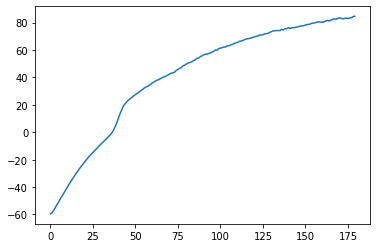

In [23]:
plt.plot(df['episode_reward_mean'])

In [24]:
ray.shutdown()
ray.init()
ModelCatalog.register_custom_model("rbf", RBFModel1)
ModelCatalog.register_custom_model("rbf_2", RBFModel2)
ModelCatalog.register_custom_model("mlp_1_256", MyKerasModel1)
ModelCatalog.register_custom_model("mlp_2_64", MyKerasModel2)

if alg == "PPO":
    trainer = ppo.PPOTrainer(config)
if alg == "SAC":
    trainer = sac.SACTrainer(config)
if alg == "DDPG":
    trainer = ddpg.DDPGTrainer(config)

trainer.restore(checkpoint_path)

2020-02-06 16:13:07,504	WARNING services.py:597 -- setpgrp failed, processes may not be cleaned up properly: [Errno 1] Operation not permitted.
2020-02-06 16:13:07,505	INFO resource_spec.py:216 -- Starting Ray with 6.1 GiB memory available for workers and up to 3.06 GiB for objects. You can adjust these settings with ray.init(memory=<bytes>, object_store_memory=<bytes>).
2020-02-06 16:13:11,852	WARNING util.py:45 -- Install gputil for GPU system monitoring.
2020-02-06 16:13:11,883	WARNING actor.py:663 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(a1651cc50100), class name = RolloutWorker.
2020-02-06 16:13:11,886	WARNING actor.py:663 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(169cae520100), class name = RolloutWorker.
2020-02-06 16:13:11,890	WARNING actor.py:663 -- Actor is garbage collected in the wrong driver. Actor id = ActorID(8e3e47920100), class name = RolloutWorker.
2020-02-06 16:13:11,894	WARNING actor.py:663 -- Actor is garbage

In [25]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import random
import tensorflow as tf
import pybullet_envs
%matplotlib inline

#env = gym.make(env_name)
#env.unwrapped.reset_model = det_reset_model

# !! this needs to reflect the environemnt you trained in
#env = gym.make("Pendulum-v0")
env = gym.make(current_env, render=True)

(pid=8768) Using TensorFlow backend.
(pid=8774) Using TensorFlow backend.
(pid=8767) Using TensorFlow backend.
(pid=8773) Using TensorFlow backend.
(pid=8772) Using TensorFlow backend.
(pid=8769) Using TensorFlow backend.
(pid=8770) Using TensorFlow backend.
(pid=8771) Using TensorFlow backend.


In [ ]:
env._max_episode_steps = 10000
obs = env.reset()



action_hist = []
m_act_hist = []
state_hist  = []
obs_hist = []
reward_hist = []

done = False
for t in range(10000):
    # for some algorithms you can get the sample mean out, need to change the value on the index to match your env for now
    # mean_actions = out_dict['behaviour_logits'][:17]
    # actions = trainer.compute_action(obs.flatten())
    sampled_actions, _ , out_dict = trainer.compute_action(obs.flatten(),full_fetch=True)
    
    actions = sampled_actions
    
    obs, reward, done, _ = env.step(np.asarray(actions))
    
    # !! uncomment to render
    env.render()
    
    action_hist.append(np.copy(actions))
    obs_hist.append(np.copy(obs))
    reward_hist.append(np.copy(reward))

print(sum(reward_hist))
print((obs_hist))
#plt.plot(action_hist)
#plt.figure()
#plt.figure()
#plt.plot(obs_hist)
#plt.figure()

In [1]:
# Reminder that the bahavior logits that come out are the mean and logstd (not log mean, despite the name logit)
trainer.compute_action(obs, full_fetch=True)

NameError: name 'trainer' is not defined